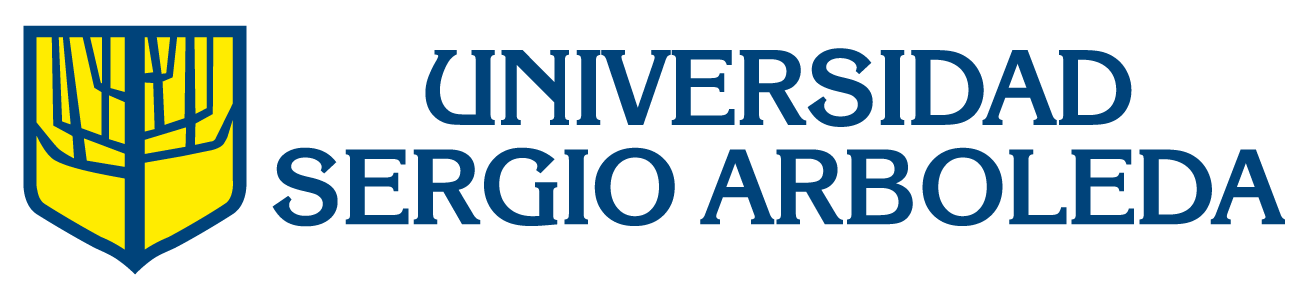


---




#**Taller 2 - Procesamiento de Histogramas**

**Autores:**  

* Carlos Bermúdez
* Miguel Thomas


**Programa acádemico:**  

* Ciencias de la computación e Inteligencia Artificial

**Materia:**   
* Procesamiento de Imagenes

Notas.

monotonica creciente / dominio y rango entre los mismos valores / no quiere umbralizacion  debe ser función funcional (puede ser a trozos)  diferente de un promedio

#__Requerimientos__
Escribir un programa corto que le permita:

* Seleccionar una (o varias) de las imágenes.

* Abrir la imagen y dejarla en escala de grises en un solo canal
* Realizar una expansión de contraste
* Hacer una ecualización del histograma
* Escribir un texto acerca de las similitudes y diferencias en el procesamiento
  de imagen por expansión de contraste y ecualización
* Proponer una función de transformación y cual seria el objetivo de la misma (Una por cada integrante del equipo)
* Aplicarla sobre la imagen y pintar el histograma, describir que fue lo que paso
* Entregar un archivo .zip o .7z con el notebook de python o con un script y un documento adjunto con la explicación. mas la imagen utilizada

* los filtros no pueden ser umbralizacion, negativo estandar, promedio



C1-dmartinez-taller2.zip

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
!wget "https://petapixel.com/assets/uploads/2019/04/p2219651326-5.jpg" -O tree.jpg

--2024-03-05 04:05:58--  https://petapixel.com/assets/uploads/2019/04/p2219651326-5.jpg
Resolving petapixel.com (petapixel.com)... 104.26.5.184, 104.26.4.184, 172.67.70.151, ...
Connecting to petapixel.com (petapixel.com)|104.26.5.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58764 (57K) [image/jpeg]
Saving to: ‘tree.jpg’

tree.jpg            100%[===================>]  57.39K  --.-KB/s    in 0.001s  

2024-03-05 04:05:58 (87.8 MB/s) - ‘tree.jpg’ saved [58764/58764]



In [3]:
# Descargar imagen
!wget "https://static5.depositphotos.com/1030296/395/i/450/depositphotos_3958211-stock-photo-new-york-cityscape-tourism-concept.jpg" -O newyork.jpg

--2024-03-05 04:06:01--  https://static5.depositphotos.com/1030296/395/i/450/depositphotos_3958211-stock-photo-new-york-cityscape-tourism-concept.jpg
Resolving static5.depositphotos.com (static5.depositphotos.com)... 23.32.161.222
Connecting to static5.depositphotos.com (static5.depositphotos.com)|23.32.161.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49648 (48K) [image/jpeg]
Saving to: ‘newyork.jpg’

newyork.jpg         100%[===================>]  48.48K  --.-KB/s    in 0.01s   

2024-03-05 04:06:01 (4.64 MB/s) - ‘newyork.jpg’ saved [49648/49648]



##__Escala de grises: Un canal__
Convertimos la imagen a escala de grises dejando un único canal, esto para simplificar el processamiento de la imagen


In [6]:
img_tree = cv2.imread("tree.jpg")
img_tree_gray  = cv2.cvtColor(img_tree, cv2.COLOR_BGR2GRAY)

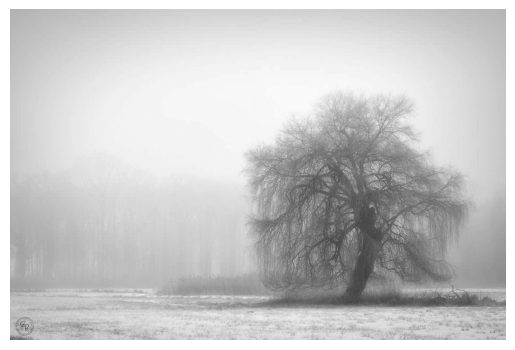

In [8]:
# Mostrar la imagen en escala de grises
plt.imshow(img_tree_gray, cmap='gray')
plt.axis('off')
plt.show()

##__Realizar una expansion de contraste__

La imagen escogida posee bajo contraste, es decir, la diferencia entre tonos claros y oscuros es poca lo que la hace una imagen algo plana.

Entonces al realizarle una expansión de contraste, proceso que consiste en mejorar la diferencia entre estos tonos justamente dado que ajusta el rango de intensidades, en teoría como resultado debemos obtener una imagen mas nítida y detallada.

In [20]:
I_min = np.min(img_tree_gray)
I_max = np.max(img_tree_gray)
a = 255.0 / (I_max - I_min)
b = -a * I_min

imagen_contrastada = (a * img_tree_gray + b).clip(0, 255).astype(np.uint8)

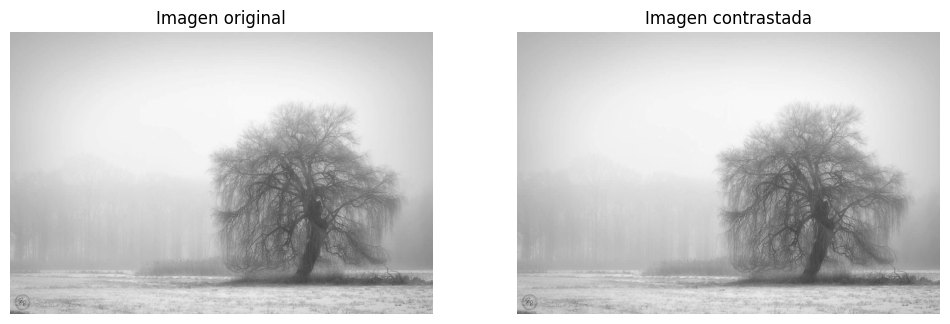

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_tree_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_contrastada, cmap='gray')
plt.title('Imagen contrastada')
plt.axis('off')

plt.show()

##__Ecualizacion del histograma__

La ecualización del histograma es un proceso para mejorar el contraste y la distribución de intensidades en una imagen.

Este proceso implica redistribuir las intensidades de los píxeles para cubrir un rango más amplio de valores, lo que resalta los detalles finos y hace que la imagen sea más nítida y detallada.

Es decir, se espera que en la imagen sean visibles mas detalles, y tenga mejor apariencia, pueda distinguirse mas información

In [26]:
ecualizada = cv2.equalizeHist(img_tree_gray.astype(np.uint8))

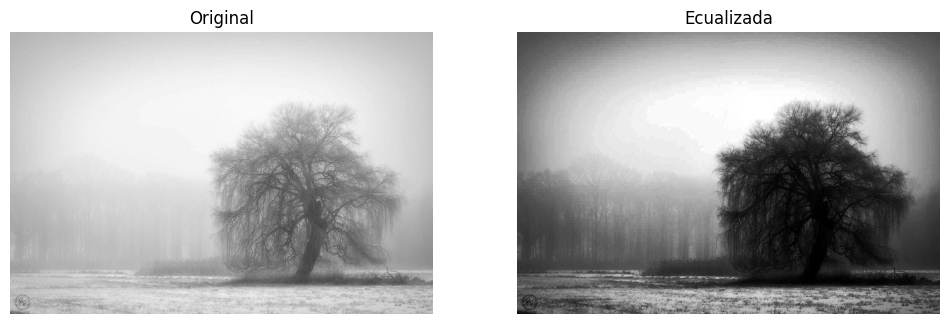

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_tree_gray, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ecualizada, cmap='gray')
plt.title('Ecualizada')
plt.axis('off')

plt.show()

## Proponer una funcion de transformacion

### Transformacion: Gamma
* Objetivo: Modificar la luminancia de la imagen para mejorar la visualización y calidad de la imagen

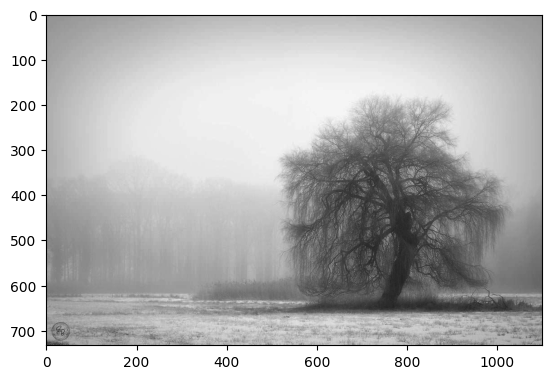

In [28]:
def transformacion_gamma(imagen, gamma=1.0):
    invGamma = 1.0 / gamma
    tabla = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(imagen, tabla)

imagen_gamma = transformacion_gamma(img_tree_gray, gamma=0.5)

plt.imshow(imagen_gamma, cmap="gray")

### Transformacion: Logistica
* Objetivo: Resaltar características específicas de la imagen ajustando el contraste de manera no lineal, especialmente útil en imágenes con variaciones sutiles de intensidad. En este caso por ejemplo se puede apreciar mejor el arbol que se encuentra de primer plano en la imagen, descartando los demas detalles

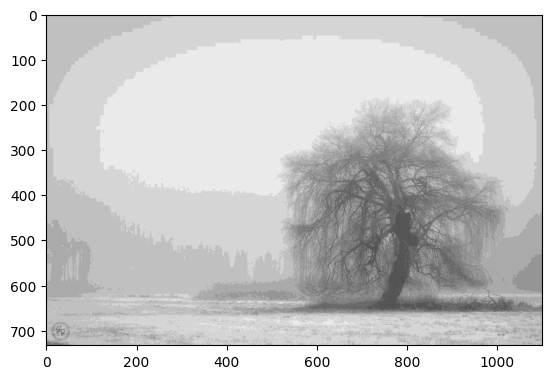

In [29]:
def transformacion_logistica(image, c=2):
    img_normalized = image / 255.0
    img_transformed = c * np.log(1 + img_normalized)
    return (img_transformed * 255).astype("uint8")

imagen_log = transformacion_logistica(img_tree_gray,0.1)

plt.imshow(imagen_log, cmap="gray")

## HISTOGRAMAS

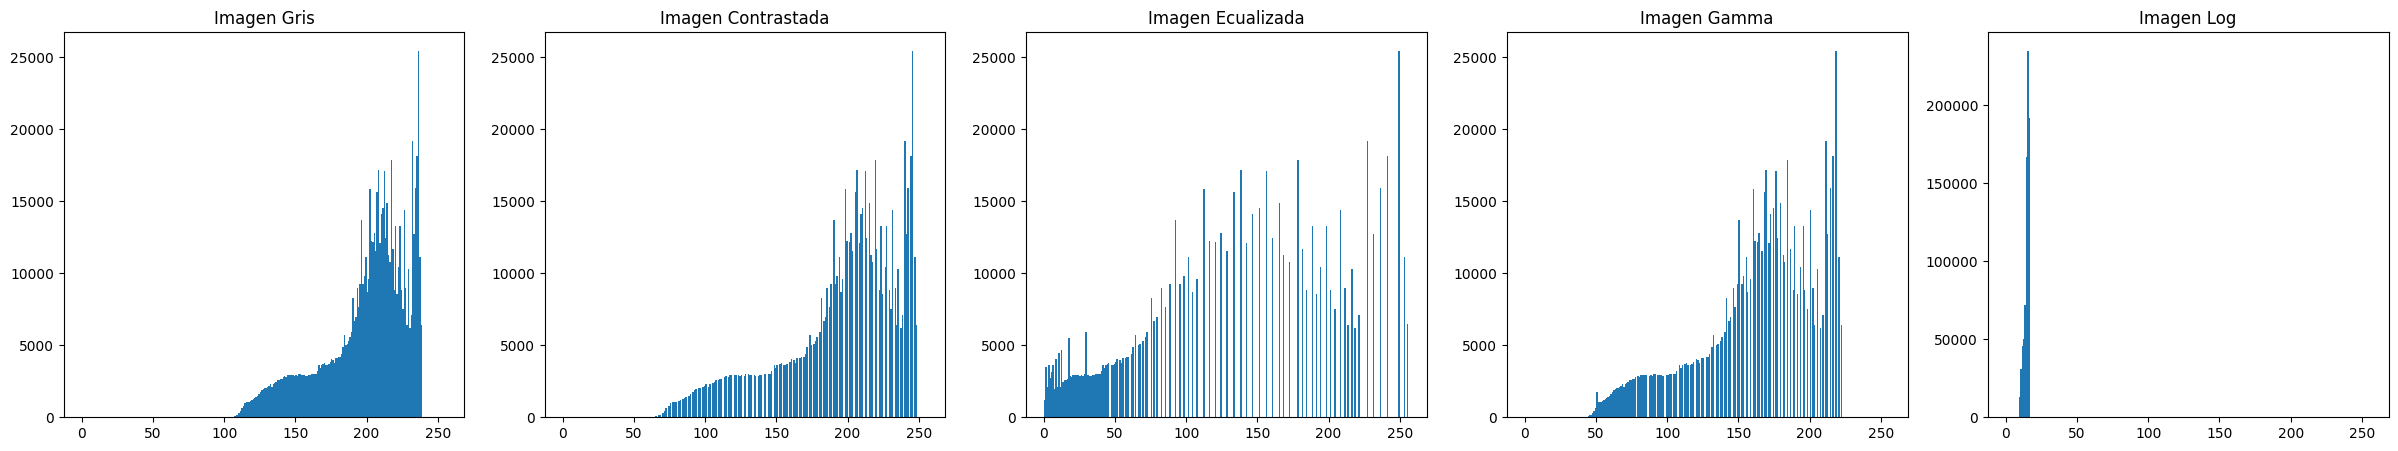

In [30]:
fig, axs = plt.subplots(1, 5, figsize=(30,5))

axs[0].hist(img_tree_gray.ravel(), bins=256, range=[0, 256])
axs[0].set_title('Imagen Gris')

axs[1].hist(imagen_contrastada.ravel(), bins=256, range=[0, 256])
axs[1].set_title('Imagen Contrastada')

axs[2].hist(ecualizada.ravel(), bins=256, range=[0, 256])
axs[2].set_title('Imagen Ecualizada')

axs[3].hist(imagen_gamma.ravel(), bins=256, range=[0, 256])
axs[3].set_title('Imagen Gamma')

axs[4].hist(imagen_log.ravel(), bins=256, range=[0, 256])
axs[4].set_title('Imagen Log')

plt.show()

Primeramente en la imagen original los valores tendian a ser altos, es decir, la imagen es de bajo contraste, colores y tonos claros, poco contraste

Al aumenta el contraste por expansion entonces aumentó un poco el rango de valores pero no se observo significativamente en la imagen

Al ecualizar el histograma si se notó mucho la diferencia de las imagenes con la original, y se distribuyó las intensidades de manera mas uniforme aumenta los detalles visibles

Algo parecido ocurrio con gamma, se distribuyó mejor las intensidades

Pero con log se limitó más ya que se enfocó en una caracteristica de la imagen mas especifica con sus respectivos valores de intensidad asociados